<h1>Problem 3</h1>
<a>PartA: </a>
<div> Investigation of the behaviour of training and testing errors of output when the number of hidden nodes is fixed to 3 nodes.  Sample data will vary from 40-200 patterns </div>
    

<h2> Function 1 Solution </h2>

In [5]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import tensorflow as tf

#class for solutions
class NN:
    def __init__(self, x=None,y=None, num_samples=[], num_nodes=[]):
        self.num_nodes= num_nodes
        self.x=x
        self.y=y
        self.num_samples= num_samples
        self.model_results={}
        self.model={}
        
    def model_build(self):   
        optimizer = "RMSprop"
        for i in self.num_nodes:
            self.model[str(i)+ '_nodes']= Sequential()
            self.model[str(i)+ '_nodes'].add(Dense(i, activation= 'sigmoid', input_dim=self.x.shape[1]))
            self.model[str(i)+ '_nodes'].add(Dense(1,activation= 'sigmoid'))
            self.model[str(i)+ '_nodes'].compile(optimizer= optimizer, loss='mse', metrics=['mae', 'mse'])

    def error_plots(self):
        for n in self.num_nodes:
            for i in self.num_samples:
                self.model[str(n)+'_nodes'].fit(x=self.x[:i], y=self.y[:i],validation_split= 0.3, epochs=100, verbose=0)
                print('Error vs. Epochs plot for ', i, ' samples and ', n, ' nodes: ')
                plt.figure()
                plt.plot(self.model[str(n)+'_nodes'].history.history['loss'] , 'b', label= 'Training Error')
                plt.plot(self.model[str(n)+'_nodes'].history.history['val_loss'], 'r', label= 'Testing Error' )
                plt.legend()
                plt.xlabel('Epochs')
                plt.ylabel('Error')
                plt.show()


            

            
        
        
        



Error vs. Epochs plot for  40  samples and  3  nodes: 


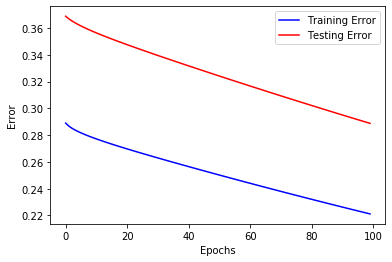

Error vs. Epochs plot for  100  samples and  3  nodes: 


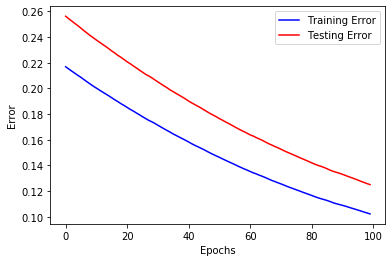

Error vs. Epochs plot for  150  samples and  3  nodes: 


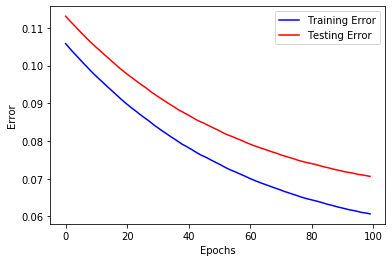

Error vs. Epochs plot for  200  samples and  3  nodes: 


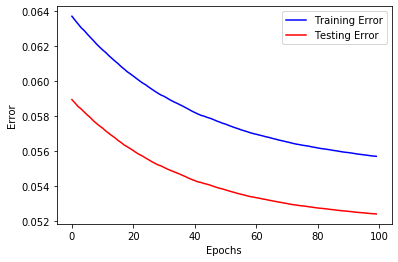

In [6]:
x1= np.random.uniform(-1, 1, [1000,1])

y1= x1*np.sin(6*np.pi*x1)*np.exp(-1*(np.square(x1,x1)))
#x1=x1.reshape((len(x1),1))

cc= NN(x=x1,y=y1, num_samples=[40,100,150,200], num_nodes=[3])
cc.model_build()
cc.error_plots()


<h2> Function 2 Solution <h2>

Error vs. Epochs plot for  40  samples and  3  nodes: 


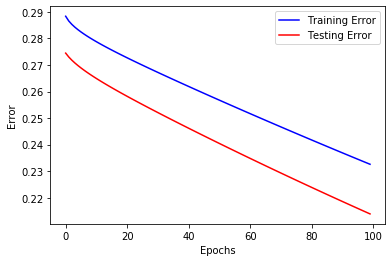

Error vs. Epochs plot for  100  samples and  3  nodes: 


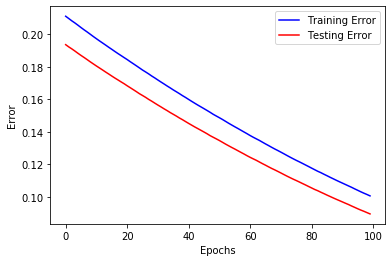

Error vs. Epochs plot for  150  samples and  3  nodes: 


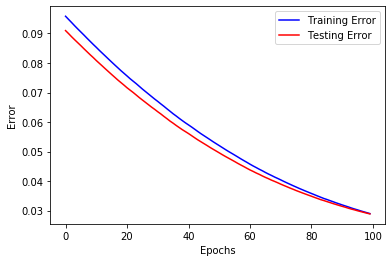

Error vs. Epochs plot for  200  samples and  3  nodes: 


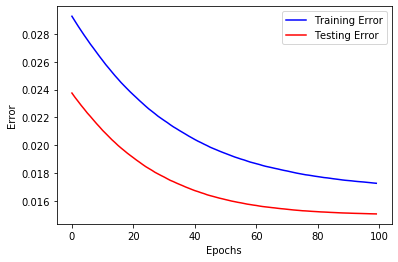

In [7]:
x2= np.random.uniform(-2, 2, [10000,1])
y2= np.exp(-1*np.square(x2,x2))*np.arctan(x2)*np.sin(4*np.pi*x2)
#x2=x2.reshape((len(x2),1))

ccc= NN(x=x2,y=y2, num_samples=[40,100,150,200], num_nodes=[3])
ccc.model_build()
ccc.error_plots()


<h1>Problem 3</h1>
<a>Part B: </a>
<div> Investigate the effect of the number of hidden nodes on training and testing error for 100 training samples.  What is the optimal number of hidden nodes for smallest training and testing error </div>
        

<h2> Function 1 </h2>

Error vs. Epochs plot for  100  samples and  3  nodes: 


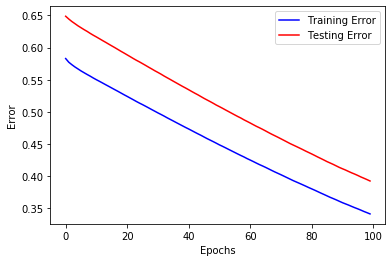

Error vs. Epochs plot for  100  samples and  5  nodes: 


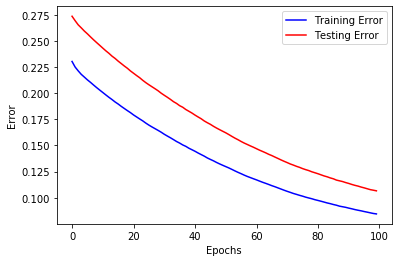

Error vs. Epochs plot for  100  samples and  10  nodes: 


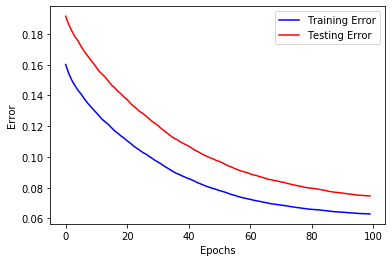

Error vs. Epochs plot for  100  samples and  15  nodes: 


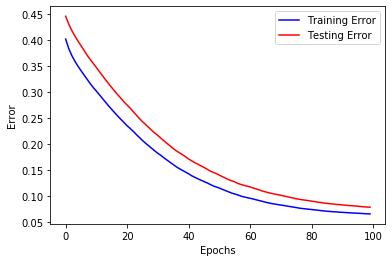

Error vs. Epochs plot for  100  samples and  20  nodes: 


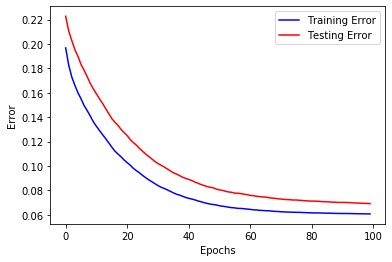

In [8]:
x1= np.random.uniform(-1, 1, [10000,1])
#x1= x1.reshape((len(x1),1))
y1= x1*np.sin(6*np.pi*x1)*np.exp(-1*(np.square(x1,x1)))

c= NN(x=x1,y=y1, num_samples=[100], num_nodes=[3,5,10, 15, 20])
c.model_build()
c.error_plots()


<h1>Problem 4</h1>
<a>PartA: </a>
<div> Set up two sets of data (train and test). Total number of samples= 500 where x1 in [-1,1], x2 in [-4,4] </div>
        
        

In [9]:
#create X and y dataset for two-one mapping function
x1= np.linspace(-1,1,num= 500)
x2= np.linspace(-4,4,num= 500)
X= np.array([x1,x2]).T
y= np.sin(2*np.pi*x1)*np.cos(0.5*np.pi*x2)*np.exp(-1*np.square(x1,x1))

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<h1>Problem 4</h1>
<a>PartB: </a>
<div> Fix number of neurons to 4, and analyze training and testing outpur errors</div>

Error vs. Epochs plot for  500  samples and  4  nodes: 


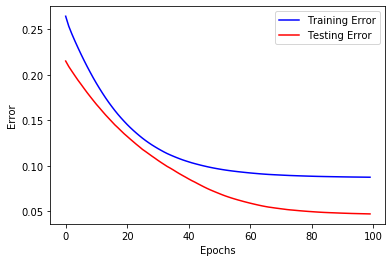

In [11]:
d= NN(x=X,y=y, num_samples=[500], num_nodes=[4])
d.model_build()
d.error_plots()


<h1>Problem 4</h1>
<a>PartC: </a>
<div> Analyze performance of network by varying hidden nodes (1,6,8,12,20).  Find best number of hidden neurons leading to least training and testing error.  Discuss which model is best suited for both training and testing at the same time </div>

Error vs. Epochs plot for  500  samples and  2  nodes: 


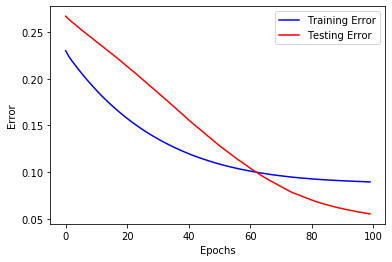

Error vs. Epochs plot for  500  samples and  6  nodes: 


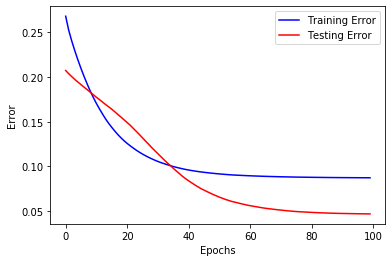

Error vs. Epochs plot for  500  samples and  8  nodes: 


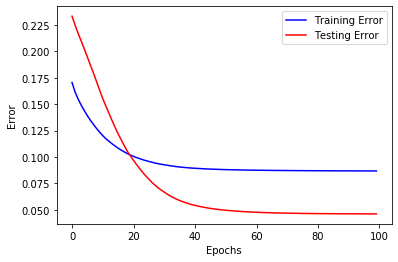

Error vs. Epochs plot for  500  samples and  12  nodes: 


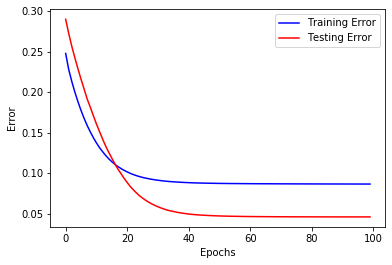

Error vs. Epochs plot for  500  samples and  20  nodes: 


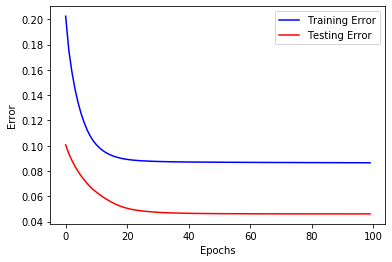

In [12]:
e= NN(x=X,y=y, num_samples=[500], num_nodes=[2,6,8,12,20])
e.model_build()
e.error_plots()


<h1>Problem 5</h1>
<a>Part 5.1: </a>
<div> Design classifier.  Vary parameters (number of hidden layers without exceeding three and number of nodes in each layer.  Try to find best possible classification performance.  Illustrate various results in a table as parameters are varied  </div>

In [15]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler


dataset= pd.read_csv('Problem5_data.csv')
X= dataset.iloc[:,1:].values

#feature scaling
ss= StandardScaler()
X= ss.fit_transform(X)

#one hot encode labels
y= pd.get_dummies(dataset.iloc[:,0]).values

In [16]:
class Custom_NN:
    def __init__(self,x=None, y=None, hidden_layers=[]):
        self.hidden_layers=hidden_layers
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
    def model_build(self):
        self.model= Sequential()
        self.model.add(Dense(self.hidden_layers[0], activation= 'relu', input_dim=self.x_train[0].shape[0]))
        for i in self.hidden_layers[1:]: 
            self.model.add(Dense(i, activation= 'relu'))
        self.model.add(Dense(3, activation= 'softmax'))
        self.model.compile(optimizer= 'Adam',loss= 'categorical_crossentropy', metrics= ['accuracy'])
    
    def error_plots(self):
        self.model.fit(x=self.x_train, y=self.y_train,validation_split= 0.3, batch_size=8, epochs=100, verbose=0)
        print('Error vs. Epochs plot for ',len(self.hidden_layers) , ' layers with nodes: ', self.hidden_layers)
        plt.figure()
        plt.plot(self.model.history.history['loss'] , 'b', label= 'Training Error')
        plt.plot(self.model.history.history['val_loss'], 'r', label= 'Testing Error' )
        plt.legend()
        plt.xlabel('Epochs')
        plt.ylabel('Error')
        plt.show() 
    
    def evaluate(self):
        # Evaluate the model on the test data using `evaluate`
        print('\n# Evaluate on test data')
        self.results = self.model.evaluate(self.x_test, self.y_test, batch_size=8)
        print('test loss, test acc:', self.results)
        print()


  

        

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Error vs. Epochs plot for  1  layers with nodes:  [3]


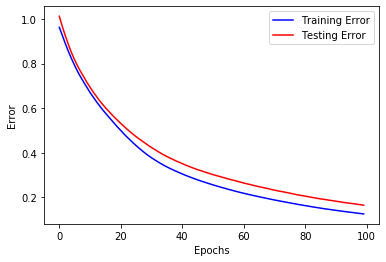


# Evaluate on test data
36/36 [==============================] - 0s 341us/step
test loss, test acc: [0.1958029783434338, 0.9722222222222222]

Error vs. Epochs plot for  1  layers with nodes:  [8]


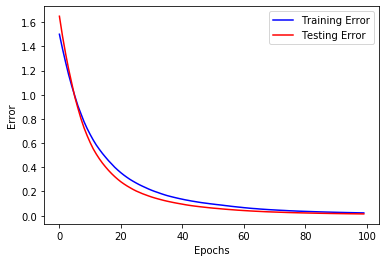


# Evaluate on test data
36/36 [==============================] - 0s 227us/step
test loss, test acc: [0.15026577514234102, 0.9166666666666666]

Error vs. Epochs plot for  1  layers with nodes:  [15]


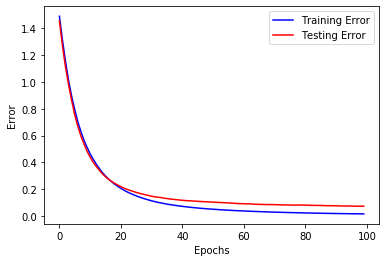


# Evaluate on test data
36/36 [==============================] - 0s 241us/step
test loss, test acc: [0.2118816268371625, 0.8888888888888888]

Error vs. Epochs plot for  2  layers with nodes:  [4, 4]


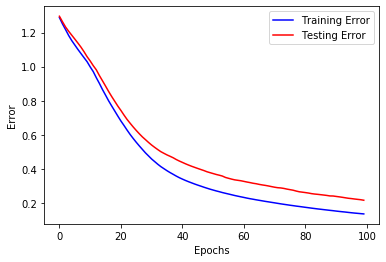


# Evaluate on test data
36/36 [==============================] - 0s 228us/step
test loss, test acc: [0.21995819525586235, 0.9444444444444444]

Error vs. Epochs plot for  2  layers with nodes:  [3, 20]


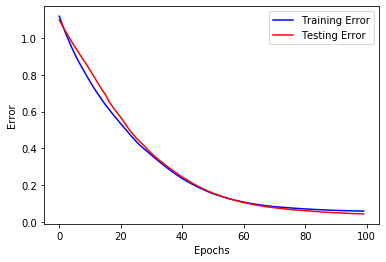


# Evaluate on test data
36/36 [==============================] - 0s 661us/step
test loss, test acc: [0.5006606578826904, 0.8888888888888888]

Error vs. Epochs plot for  2  layers with nodes:  [20, 3]


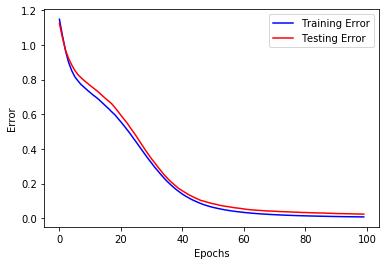


# Evaluate on test data
36/36 [==============================] - 0s 325us/step
test loss, test acc: [0.3548641819183508, 0.8888888888888888]

Error vs. Epochs plot for  2  layers with nodes:  [20, 20]


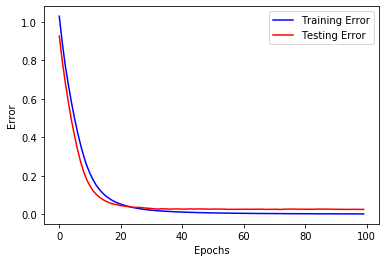


# Evaluate on test data
36/36 [==============================] - 0s 468us/step
test loss, test acc: [0.17572717172919916, 0.9166666666666666]

Error vs. Epochs plot for  3  layers with nodes:  [4, 4, 4]


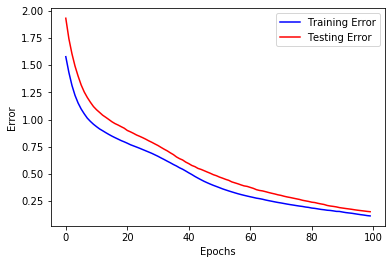


# Evaluate on test data
36/36 [==============================] - 0s 190us/step
test loss, test acc: [0.31000249750084347, 0.8611111111111112]

Error vs. Epochs plot for  3  layers with nodes:  [4, 20, 4]


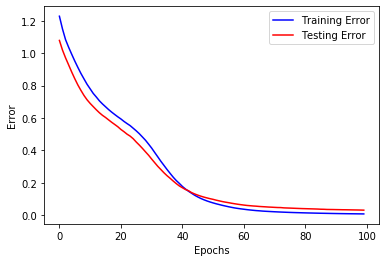


# Evaluate on test data
36/36 [==============================] - 0s 350us/step
test loss, test acc: [0.34346990520457943, 0.8888888888888888]

Error vs. Epochs plot for  3  layers with nodes:  [20, 4, 20]


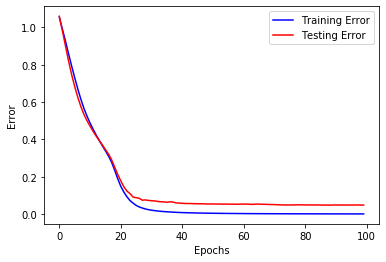


# Evaluate on test data
36/36 [==============================] - 0s 480us/step
test loss, test acc: [0.3801594942823512, 0.8888888888888888]

Error vs. Epochs plot for  3  layers with nodes:  [20, 20, 20]


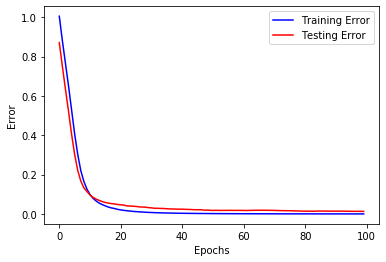


# Evaluate on test data
36/36 [==============================] - 0s 287us/step
test loss, test acc: [0.2691617950850084, 0.9166666666666666]



In [17]:
#list of models

models={'1':[[3],[8],[15]], '2':[[4,4],[3,20], [20,3], [20,20]], '3': [[4,4,4],[4,20,4],[20,4,20],[20,20,20]]}

for i in models.keys():
    for n in models[i]:
        bbz= Custom_NN(X,y, hidden_layers=n)
        bbz.model_build()
        bbz.error_plots()
        bbz.evaluate()

<h1>Problem 5</h1>
<a>Part 5.2: </a>
<div> Classify entries a,b,c from instructions
</div>

Error vs. Epochs plot for  3  layers with nodes:  [4, 4, 4]


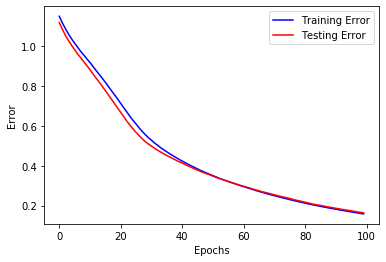


# Evaluate on test data
36/36 [==============================] - 0s 227us/step
test loss, test acc: [0.2814216871694144, 0.8888888888888888]



In [18]:
bbz= Custom_NN(X,y, hidden_layers= [4,4,4])
bbz.model_build()
bbz.error_plots()
bbz.evaluate()

In [19]:
a= [13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.97,1285]
a= np.array(a)
a=a.reshape(1,13)
a= ss.transform(a)

b= [12.04,4.3,2.38,22,80,2.1,1.75,0.42,1.35,2.6,0.79,2.57,580]
b= np.array(b)
b=b.reshape(1,13)
b= ss.transform(b)

c= [14.13,4.1,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.6,560]
c= np.array(c)
c=c.reshape(1,13)
c= ss.transform(c)


In [20]:
bbz.model.predict_classes([a])

array([0])

In [21]:
bbz.model.predict_classes([b])

array([1])

In [22]:
bbz.model.predict_classes([c])

array([2])